In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure
import re
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms


In [23]:
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
TCDvoip = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\TCDVoipData.csv")

plot_data_corr(x_simple,["Test"])

In [3]:
from scipy.stats import pearsonr
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3    
    
columnchoice = (Data.columns.values.tolist())
columnchoice = [e for e in columnchoice if e not in ('Ref_Wave', 'Test_Wave', 'MOS', 'Type', 'Directory')]
columnchoice

def PearsonGen(columnchoice):
    print("Please choose:")
    for idx, element in enumerate(columnchoice):
        print("{}) {}".format(idx+1,element))
    i = input("Enter number: ")
    try:
        if 0 < int(i) <= 3:
            return int(i)-1
    except:
        pass
    return None
data1 = Data['MOS']
Pearsonchoice = PearsonGen(columnchoice)
columnname = columnchoice[Pearsonchoice]
data2 = Data[columnname]
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation for '+ columnname + ': %.3f' % corr)

Please choose:
1) warp_q_mfcc
2) warp_q_mel
3) pesq
Enter number: 1
Pearsons correlation for warp_q_mfcc: -0.884


Please choose:
1) warp_q_mfcc
2) warp_q_mel
3) pesq
Enter number: 1


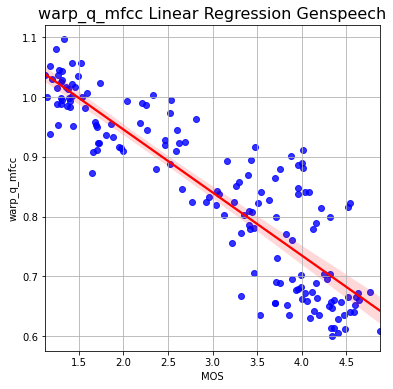

In [4]:
#Calculate Linear Regression for GenSpeech
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3    
    
columnchoice = (Data.columns.values.tolist())
columnchoice = [e for e in columnchoice if e not in ('Ref_Wave', 'Test_Wave', 'MOS', 'Type', 'Directory')]
columnchoice

def LinearRegGen(columnchoice):
    print("Please choose:")
    for idx, element in enumerate(columnchoice):
        print("{}) {}".format(idx+1,element))
    i = input("Enter number: ")
    try:
        if 0 < int(i) <= 3:
            return int(i)-1
    except:
        pass
    return None
Linearchoice = LinearRegGen(columnchoice)
Y = columnchoice[Linearchoice]
Y_value = Data[Y]
plt_1 = plt.figure(figsize=(6, 6))
sns.regplot(x=Data["MOS"], y=Y_value,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title(Y + ' Linear Regression Genspeech',fontsize = 16)
plt.grid()
plt.savefig(Y + ' Linear Regression Genspeech.png')

In [5]:
#RMSE FOR GenSpeech
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3   

columnchoice = (Data.columns.values.tolist())
columnchoice = [e for e in columnchoice if e not in ('Ref_Wave', 'Test_Wave', 'MOS', 'Type', 'Directory')]
columnchoice

def let_user_choose(columnchoice):
    print("Please choose:")
    for idx, element in enumerate(columnchoice):
        print("{}) {}".format(idx+1,element))
    i = input("Enter number: ")
    try:
        if 0 < int(i) <= 3:
            return int(i)-1
    except:
        pass
    return None
choosen = let_user_choose(columnchoice)

X = columnchoice[choosen]

Predicted_Score = Data[X]

MSE = np.square(np.subtract(Data['MOS'],Predicted_Score)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: "+ X)
print(RMSE)

Please choose:
1) warp_q_mfcc
2) warp_q_mel
3) pesq
Enter number: 1
Root Mean Square Error: warp_q_mfcc
2.518155072301434


In [6]:
directory = Data['Directory'].to_list()
directorylist = []
for i in directory:
    if i not in directorylist:
        directorylist.append(i)

In [7]:
directorylist

['mfall', 'vec18']

In [8]:
mfall_df = Data[Data['Directory'] == 'mfall']
vec18_df = Data[Data['Directory'] == 'vec18']

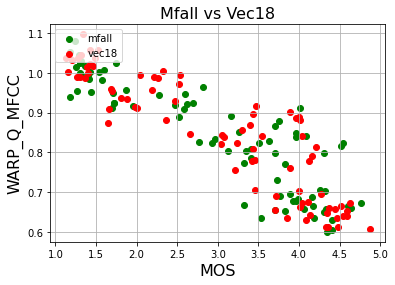

In [9]:
first = plt.scatter(mfall_df['MOS'],mfall_df['warp_q_mfcc'],color='green')
second = plt.scatter(vec18_df['MOS'],vec18_df['warp_q_mfcc'],color= 'red')
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('WARP_Q_MFCC', fontsize = 16)
plt.grid()
plt.title("Mfall vs Vec18", fontsize = 16)
plt.legend((first,second),
           ('mfall', 'vec18'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)

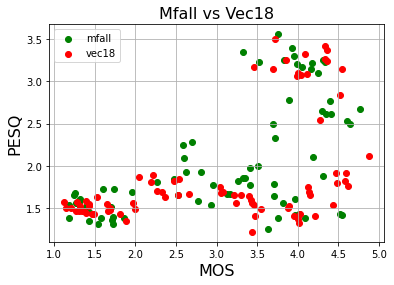

In [10]:
first = plt.scatter(mfall_df['MOS'],mfall_df['pesq'],color='green')
second = plt.scatter(vec18_df['MOS'],vec18_df['pesq'],color= 'red')
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('PESQ', fontsize = 16)
plt.grid()
plt.title("Mfall vs Vec18", fontsize = 16)
plt.legend((first,second),
           ('mfall', 'vec18'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)

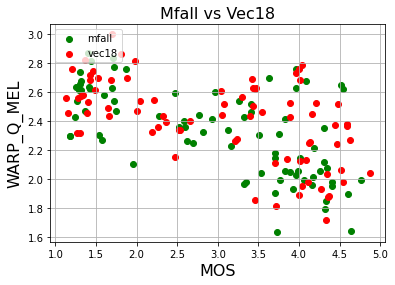

In [11]:
first = plt.scatter(mfall_df['MOS'],mfall_df['warp_q_mel'],color='green')
second = plt.scatter(vec18_df['MOS'],vec18_df['warp_q_mel'],color= 'red')
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('WARP_Q_MEL', fontsize = 16)
plt.grid()
plt.title("Mfall vs Vec18", fontsize = 16)
plt.legend((first,second),
           ('mfall', 'vec18'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)

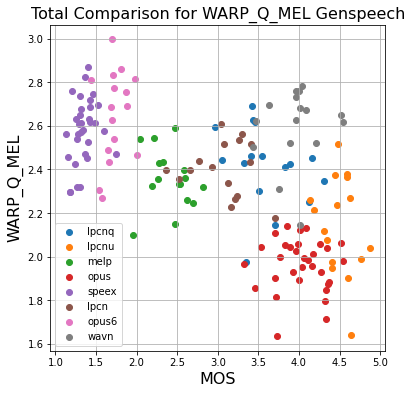

In [12]:
#WARP_Q_MEL Scatter per condition for GenSpeech

FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3  

lpcnq_df = Data[Data['Type'] == 'lpcnq']
lpcnu_df = Data[Data['Type'] == 'lpcnu']
melp_df = Data[Data['Type'] == 'melp']
opus_df = Data[Data['Type'] == 'opus']
speex_df = Data[Data['Type'] == 'speex']
lpcn_df = Data[Data['Type'] == 'lpcn']
opus6_df = Data[Data['Type'] == 'opus6']
wavn_df = Data[Data['Type'] == 'wavn']

Dataframe_List = ['lpcnq_df','lpcnu_df','melp_df','opus_df','speex_df','lpcn_df','opus6_df','wavn_df']

plt_1 = plt.figure(figsize=(6, 6))
first = plt.scatter(lpcnq_df['MOS'],lpcnq_df['warp_q_mel'])
second = plt.scatter(lpcnu_df['MOS'],lpcnu_df['warp_q_mel'])
third = plt.scatter(melp_df['MOS'],melp_df['warp_q_mel'])
fourth = plt.scatter(opus_df['MOS'],opus_df['warp_q_mel'])
fifth = plt.scatter(speex_df['MOS'],speex_df['warp_q_mel'])
sixth = plt.scatter(lpcn_df['MOS'],lpcn_df['warp_q_mel'])
seventh = plt.scatter(opus6_df['MOS'],opus6_df['warp_q_mel'])
eighth = plt.scatter(wavn_df['MOS'],wavn_df['warp_q_mel'])
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('WARP_Q_MEL', fontsize = 16)
plt.grid()
plt.title("Total Comparison for WARP_Q_MEL Genspeech", fontsize = 16)
plt.legend((first,second,third,fourth,fifth,sixth,seventh,eighth),
           ('lpcnq', 'lpcnu', 'melp', 'opus', 'speex', 'lpcn', 'opus6', 'wavn',),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=10)
plt.savefig('WARP_Q_MEL Scatter Plot per Condition GEN.png')

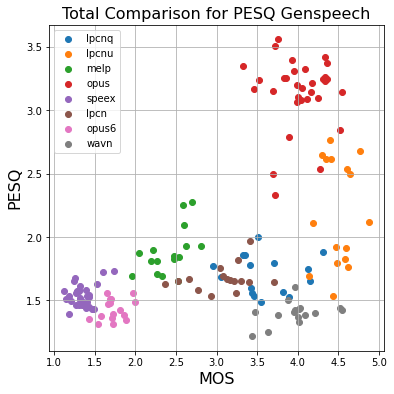

In [13]:
#PESQ Scatter per condition for GenSpeech
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3  

lpcnq_df = Data[Data['Type'] == 'lpcnq']
lpcnu_df = Data[Data['Type'] == 'lpcnu']
melp_df = Data[Data['Type'] == 'melp']
opus_df = Data[Data['Type'] == 'opus']
speex_df = Data[Data['Type'] == 'speex']
lpcn_df = Data[Data['Type'] == 'lpcn']
opus6_df = Data[Data['Type'] == 'opus6']
wavn_df = Data[Data['Type'] == 'wavn']

Dataframe_List = ['lpcnq_df','lpcnu_df','melp_df','opus_df','speex_df','lpcn_df','opus6_df','wavn_df']

plt_1 = plt.figure(figsize=(6, 6))
first = plt.scatter(lpcnq_df['MOS'],lpcnq_df['pesq'])
second = plt.scatter(lpcnu_df['MOS'],lpcnu_df['pesq'])
third = plt.scatter(melp_df['MOS'],melp_df['pesq'])
fourth = plt.scatter(opus_df['MOS'],opus_df['pesq'])
fifth = plt.scatter(speex_df['MOS'],speex_df['pesq'])
sixth = plt.scatter(lpcn_df['MOS'],lpcn_df['pesq'])
seventh = plt.scatter(opus6_df['MOS'],opus6_df['pesq'])
eighth = plt.scatter(wavn_df['MOS'],wavn_df['pesq'])
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('PESQ', fontsize = 16)
plt.grid()
plt.title("Total Comparison for PESQ Genspeech", fontsize = 16)
plt.legend((first,second,third,fourth,fifth,sixth,seventh,eighth),
           ('lpcnq', 'lpcnu', 'melp', 'opus', 'speex', 'lpcn', 'opus6', 'wavn',),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)
plt.savefig('PESQ Scatter Plot per Condition GEN.png')

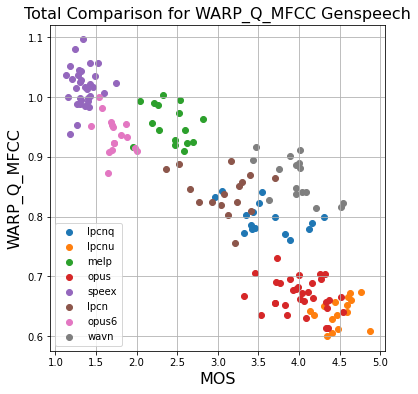

In [14]:
#WARP_Q_MFCC Scatter per condition for GenSpeech
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3  

lpcnq_df = Data[Data['Type'] == 'lpcnq']
lpcnu_df = Data[Data['Type'] == 'lpcnu']
melp_df = Data[Data['Type'] == 'melp']
opus_df = Data[Data['Type'] == 'opus']
speex_df = Data[Data['Type'] == 'speex']
lpcn_df = Data[Data['Type'] == 'lpcn']
opus6_df = Data[Data['Type'] == 'opus6']
wavn_df = Data[Data['Type'] == 'wavn']

Dataframe_List = ['lpcnq_df','lpcnu_df','melp_df','opus_df','speex_df','lpcn_df','opus6_df','wavn_df']

plt_1 = plt.figure(figsize=(6, 6))
first = plt.scatter(lpcnq_df['MOS'],lpcnq_df['warp_q_mfcc'])
second = plt.scatter(lpcnu_df['MOS'],lpcnu_df['warp_q_mfcc'])
third = plt.scatter(melp_df['MOS'],melp_df['warp_q_mfcc'])
fourth = plt.scatter(opus_df['MOS'],opus_df['warp_q_mfcc'])
fifth = plt.scatter(speex_df['MOS'],speex_df['warp_q_mfcc'])
sixth = plt.scatter(lpcn_df['MOS'],lpcn_df['warp_q_mfcc'])
seventh = plt.scatter(opus6_df['MOS'],opus6_df['warp_q_mfcc'])
eighth = plt.scatter(wavn_df['MOS'],wavn_df['warp_q_mfcc'])
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('WARP_Q_MFCC', fontsize = 16)
plt.grid()
plt.title("Total Comparison for WARP_Q_MFCC Genspeech", fontsize = 16)
plt.legend((first,second,third,fourth,fifth,sixth,seventh,eighth),
           ('lpcnq', 'lpcnu', 'melp', 'opus', 'speex', 'lpcn', 'opus6', 'wavn',),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=10)
plt.savefig('WARP_Q_MFCC Scatter Plot per Condition GEN.png')

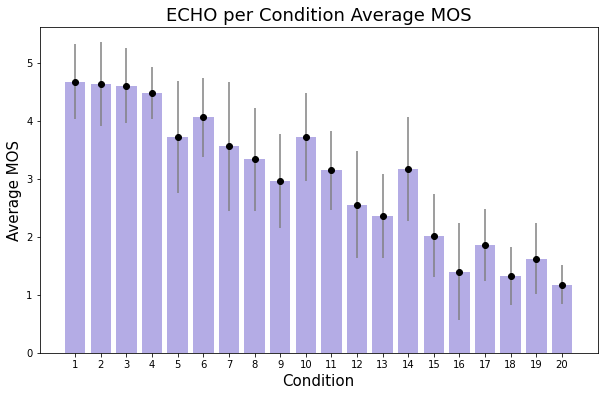

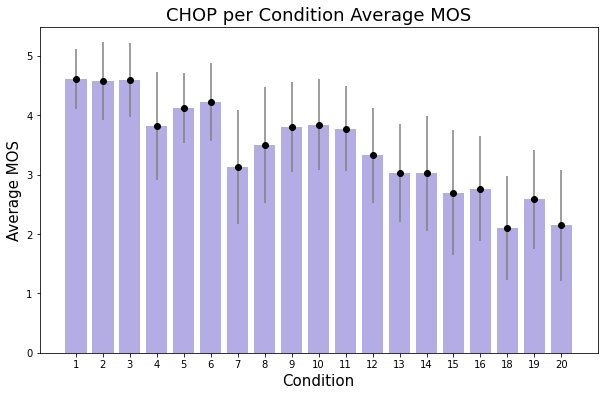

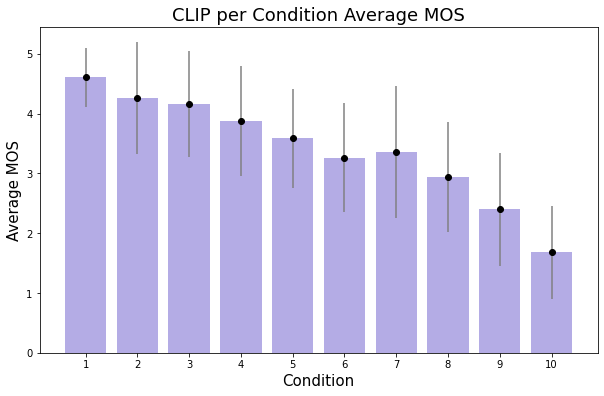

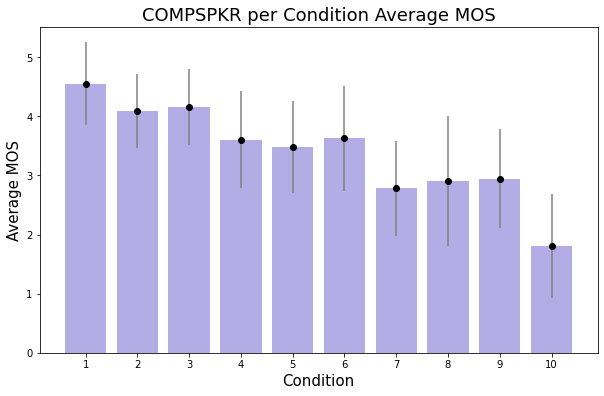

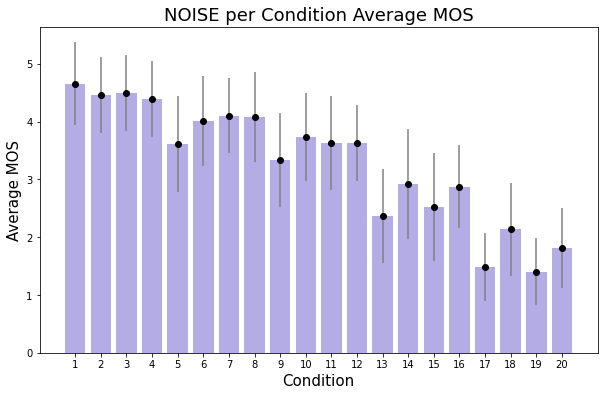

In [15]:
#Bar Charts per condition for TCDVOIP
TCDvoip = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\TCDVoipData.csv")
x = TCDvoip['Degradation'].to_list()
deglist = []
for i in x:
    if i not in deglist:
        deglist.append(i)
del deglist[2]

ECHO_df = TCDvoip[TCDvoip['Degradation'] == 'ECHO']
CHOP_df = TCDvoip[TCDvoip['Degradation'] == 'CHOP']
CLIP_df = TCDvoip[TCDvoip['Degradation'] == 'CLIP']
COMPSPKR_df = TCDvoip[TCDvoip['Degradation'] == 'COMPSPKR']
NOISE_df = TCDvoip[TCDvoip['Degradation'] == 'NOISE']
list_of_dfs = [ECHO_df,CHOP_df,CLIP_df,COMPSPKR_df,NOISE_df]

ConditionECHO_df = ECHO_df.drop_duplicates(subset=['Condition'])
ConditionCHOP_df = CHOP_df.drop_duplicates(subset=['Condition'])
ConditionCLIP_df = CLIP_df.drop_duplicates(subset=['Condition'])
ConditionCOMPSPKR_df = COMPSPKR_df.drop_duplicates(subset=['Condition'])
ConditionNOISE_df = NOISE_df.drop_duplicates(subset=['Condition'])
list_of_Condition_df = [ConditionECHO_df,ConditionCHOP_df,ConditionCLIP_df,ConditionCOMPSPKR_df,ConditionNOISE_df]

count = 0
namelist = ['ECHO','CHOP','CLIP','COMPSPKR','NOISE']
for i in list_of_Condition_df:
    objects = i['Condition']
    y_pos = np.arange(len(objects))
    performance = i['conditionMOS']
    errorbar = i['sampleSTD']
    plt.figure(figsize=(10, 6))
    plt.bar(y_pos, performance, align='center', alpha=0.5,width =.8,color = 'slateblue')
    plt.errorbar(y_pos, performance, yerr = errorbar,fmt='o',ecolor = 'gray',color='black')
    plt.xticks(y_pos, objects)
    plt.xlabel('Condition',fontsize = 15)
    plt.ylabel('Average MOS',fontsize = 15)
    plt.title(namelist[count] +' per Condition Average MOS',fontsize = 18)
    plt.savefig(namelist[count] + ' Linear Regression.png')
    count += 1
    

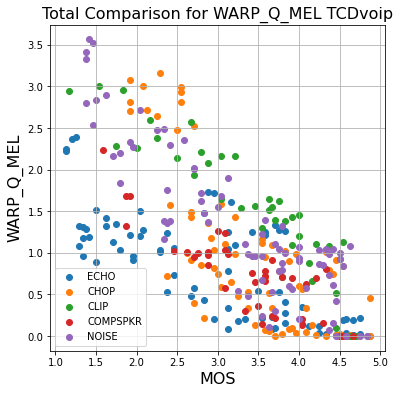

In [16]:
#WARP_Q_MEL Scatter per condition for TCDVOIP
TCDvoip = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\TCDVoipData.csv")
x = TCDvoip['Degradation'].to_list()
deglist = []
for i in x:
    if i not in deglist:
        deglist.append(i)
del deglist[2]


ECHO_df = TCDvoip[TCDvoip['Degradation'] == 'ECHO']
CHOP_df = TCDvoip[TCDvoip['Degradation'] == 'CHOP']
CLIP_df = TCDvoip[TCDvoip['Degradation'] == 'CLIP']
COMPSPKR_df = TCDvoip[TCDvoip['Degradation'] == 'COMPSPKR']
NOISE_df = TCDvoip[TCDvoip['Degradation'] == 'NOISE']

plt_1 = plt.figure(figsize=(6, 6))
first = plt.scatter(ECHO_df['sampleMOS'],ECHO_df['warp_q_mel'])
second = plt.scatter(CHOP_df['sampleMOS'],CHOP_df['warp_q_mel'])
third = plt.scatter(CLIP_df['sampleMOS'],CLIP_df['warp_q_mel'])
fourth = plt.scatter(COMPSPKR_df['sampleMOS'],COMPSPKR_df['warp_q_mel'])
fifth = plt.scatter(NOISE_df['sampleMOS'],NOISE_df['warp_q_mel'])
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('WARP_Q_MEL', fontsize = 16)
plt.grid()
plt.title("Total Comparison for WARP_Q_MEL TCDvoip", fontsize = 16)
plt.legend((first,second,third,fourth,fifth),
           ('ECHO', 'CHOP', 'CLIP', 'COMPSPKR', 'NOISE'),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=10)
plt.savefig('Total Comparison for WARP_Q_MEL TCDvoip.png')

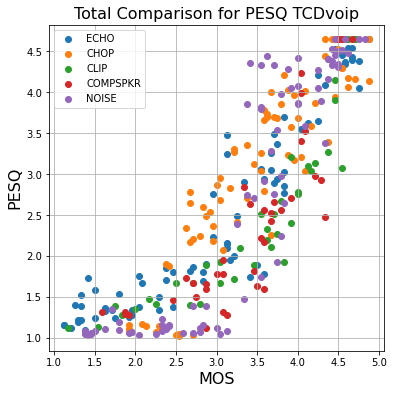

In [17]:
#PESQ Scatter per condition for TCDVOIP
TCDvoip = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\TCDVoipData.csv")
x = TCDvoip['Degradation'].to_list()
deglist = []
for i in x:
    if i not in deglist:
        deglist.append(i)
del deglist[2]


ECHO_df = TCDvoip[TCDvoip['Degradation'] == 'ECHO']
CHOP_df = TCDvoip[TCDvoip['Degradation'] == 'CHOP']
CLIP_df = TCDvoip[TCDvoip['Degradation'] == 'CLIP']
COMPSPKR_df = TCDvoip[TCDvoip['Degradation'] == 'COMPSPKR']
NOISE_df = TCDvoip[TCDvoip['Degradation'] == 'NOISE']

plt_1 = plt.figure(figsize=(6, 6))
first = plt.scatter(ECHO_df['sampleMOS'],ECHO_df['pesq'])
second = plt.scatter(CHOP_df['sampleMOS'],CHOP_df['pesq'])
third = plt.scatter(CLIP_df['sampleMOS'],CLIP_df['pesq'])
fourth = plt.scatter(COMPSPKR_df['sampleMOS'],COMPSPKR_df['pesq'])
fifth = plt.scatter(NOISE_df['sampleMOS'],NOISE_df['pesq'])
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('PESQ', fontsize = 16)
plt.grid()
plt.title("Total Comparison for PESQ TCDvoip", fontsize = 16)
plt.legend((first,second,third,fourth,fifth),
           ('ECHO', 'CHOP', 'CLIP', 'COMPSPKR', 'NOISE'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)
plt.savefig('Total Comparison for PESQ TCDvoip.png')

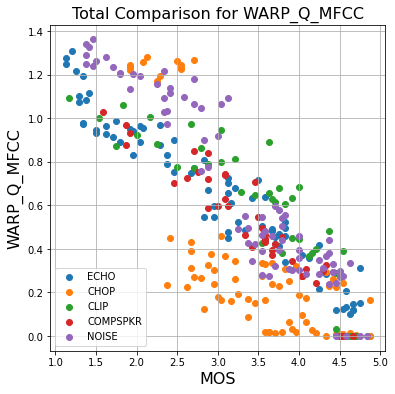

In [18]:
#WARP_Q_MFCC Scatter per condition for TCDVOIP
TCDvoip = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\TCDVoipData.csv")
x = TCDvoip['Degradation'].to_list()
deglist = []
for i in x:
    if i not in deglist:
        deglist.append(i)
del deglist[2]

ECHO_df = TCDvoip[TCDvoip['Degradation'] == 'ECHO']
CHOP_df = TCDvoip[TCDvoip['Degradation'] == 'CHOP']
CLIP_df = TCDvoip[TCDvoip['Degradation'] == 'CLIP']
COMPSPKR_df = TCDvoip[TCDvoip['Degradation'] == 'COMPSPKR']
NOISE_df = TCDvoip[TCDvoip['Degradation'] == 'NOISE']

plt_1 = plt.figure(figsize=(6, 6))
first = plt.scatter(ECHO_df['sampleMOS'],ECHO_df['warp_q_mfcc'])
second = plt.scatter(CHOP_df['sampleMOS'],CHOP_df['warp_q_mfcc'])
third = plt.scatter(CLIP_df['sampleMOS'],CLIP_df['warp_q_mfcc'])
fourth = plt.scatter(COMPSPKR_df['sampleMOS'],COMPSPKR_df['warp_q_mfcc'])
fifth = plt.scatter(NOISE_df['sampleMOS'],NOISE_df['warp_q_mfcc'])
plt.xlabel("MOS", fontsize = 16)
plt.ylabel('WARP_Q_MFCC', fontsize = 16)
plt.grid()
plt.title("Total Comparison for WARP_Q_MFCC", fontsize = 16)
plt.legend((first,second,third,fourth,fifth),
           ('ECHO', 'CHOP', 'CLIP', 'COMPSPKR', 'NOISE'),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=10)
plt.savefig('Total Comparison for WARP_Q_MFCC TCDvoip.png')

In [19]:
#Root Mean Square Error for TCDVOIP
TCDvoip = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\TCDVoipData.csv")
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3   

columnchoice = (Data.columns.values.tolist())
columnchoice = [e for e in columnchoice if e not in ('Ref_Wave', 'Test_Wave', 'MOS', 'Type', 'Directory')]
columnchoice


def let_user_choose(columnchoice):
    print("Please choose:")
    for idx, element in enumerate(columnchoice):
        print("{}) {}".format(idx+1,element))
    i = input("Enter number: ")
    try:
        if 0 < int(i) <= 3:
            return int(i)-1
    except:
        pass
    return None
choosen = let_user_choose(columnchoice)

X = columnchoice[choosen]

Predicted_Score = TCDvoip[X]

MSE = np.square(np.subtract(TCDvoip['sampleMOS'],Predicted_Score)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: "+ X)
print(RMSE)

Please choose:
1) warp_q_mfcc
2) warp_q_mel
3) pesq
Enter number: 1
Root Mean Square Error: warp_q_mfcc
2.9645856763085825


Please choose:
1) warp_q_mfcc
2) warp_q_mel
3) pesq
Enter number: 1


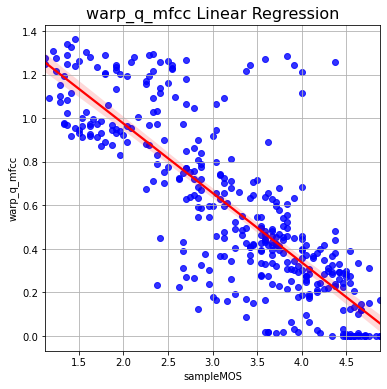

In [20]:
#Calculate Linear Regression for TCDVOIP
TCDvoip = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\TCDVoipData.csv")
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3   

columnchoice = (Data.columns.values.tolist())
columnchoice = [e for e in columnchoice if e not in ('Ref_Wave', 'Test_Wave', 'MOS', 'Type', 'Directory')]
columnchoice

def LinearRegTCD(columnchoice):
    print("Please choose:")
    for idx, element in enumerate(columnchoice):
        print("{}) {}".format(idx+1,element))
    i = input("Enter number: ")
    try:
        if 0 < int(i) <= 3:
            return int(i)-1
    except:
        pass
    return None
Linearchoice = LinearRegTCD(columnchoice)
Y = columnchoice[Linearchoice]
Y_value = TCDvoip[Y]
plt_1 = plt.figure(figsize=(6, 6))
sns.regplot(x=TCDvoip["sampleMOS"], y=Y_value,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.grid()
plt.title(Y + ' Linear Regression', fontsize = 16)
plt.savefig(Y + ' Linear Regression TCDvoip.png')

In [21]:
# calculate the Pearson's correlation between two variables for TCDVOIP
from scipy.stats import pearsonr
TCDvoip = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\TCDVoipData.csv")
FullData = pd.read_csv("C:\\Users\\Jack Crowley\\AQP\\results\\GenSpeechData.csv")
Data = FullData.drop("Unnamed: 0",1)
count = 0
count2 = 0
New_Column_List2 = []
for items in Data["Test_Wave"]:
    string = Data.at[count,'Test_Wave']
    change = string[53:-4:1]
    line = re.sub('[!@#$/9]', '', change)
    count +=1
    New_Column_List2.append(line)

New_Column_List3 = []
for items in Data["Test_Wave"]:
    string = Data.at[count2,'Test_Wave']
    change = string[41:48:1]
    line = re.sub('[!@#$/t]', '', change)
    count2 +=1
    New_Column_List3.append(line)

Data['Type']= New_Column_List2
Data['Directory']= New_Column_List3   

columnchoice = (Data.columns.values.tolist())
columnchoice = [e for e in columnchoice if e not in ('Ref_Wave', 'Test_Wave', 'MOS', 'Type', 'Directory')]
columnchoice
def PearsonTCD(columnchoice):
    print("Please choose:")
    for idx, element in enumerate(columnchoice):
        print("{}) {}".format(idx+1,element))
    i = input("Enter number: ")
    try:
        if 0 < int(i) <= 3:
            return int(i)-1
    except:
        pass
    return None
data1 = TCDvoip['sampleMOS']
Pearsonchoice = PearsonTCD(columnchoice)
columnname = columnchoice[Pearsonchoice]
data2 = TCDvoip[columnname]
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation for '+ columnname + ': %.3f' % corr)

Please choose:
1) warp_q_mfcc
2) warp_q_mel
3) pesq
Enter number: 1
Pearsons correlation for warp_q_mfcc: -0.812
